# ***Engr.Muhammad Javed***

## **Support Vector Machine(SVM):**

## *Importing Required Libraries*


In [19]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder , StandardScaler , FunctionTransformer
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.metrics.pairwise import linear_kernel


## *Loading the Dataset*


In [3]:
Dataset = pd.read_csv(r"E:\AI and Data Science\ML with Engr.Muhammad Javed\File\Place.csv")

## *Show Dataset*


In [4]:
Dataset

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [5]:
Dataset.drop(["Unnamed: 0"] , axis = 1 , inplace = True)

## *Viewing Statistical Summary of the Dataset*


In [6]:
Dataset.describe()


,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


## *Visualizing CGPA vs IQ Scatter Plot by Placement*


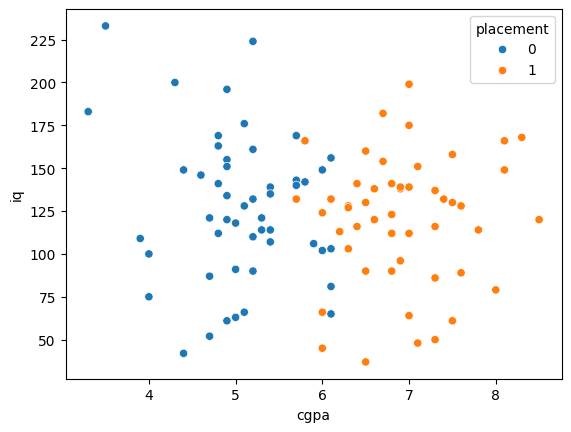

In [7]:
sn.scatterplot(x = "cgpa" , y = "iq" , data = Dataset , hue = "placement")
plt.show()


## *Splitting Features and target Variable*


In [8]:
x = Dataset[["cgpa" , "iq"]]

y = Dataset["placement"]

## *Splitting Dataset into Training and Testing Sets*


In [ ]:
X_trian , X_test , Y_trian , Y_test = train_test_split(x ,y , random_state=42 , test_size=0.2)


## *Training the Support Vector Classifier (SVC)*


In [ ]:

sv = SVC(kernel="linear") 
sv.fit(X_trian, Y_trian)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
sv.score(X_trian , Y_trian)*100

91.25

In [21]:
sv.score(X_test , Y_test)*100

95.0

## *Visualizing SVC Decision Boundaries*


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

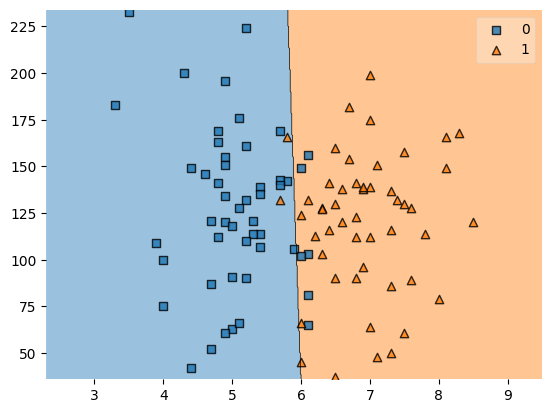

In [24]:
plot_decision_regions(X=x.to_numpy(), y=y.astype(int).to_numpy(), clf=sv)


## **Types Of Kernel**

| Kernel      | Shape of Decision Boundary        |
| ----------- | --------------------------------- |
| Linear      | Straight line (plane)             |
| Poly        | Curved polynomial                 |
| RBF         | Smooth circular / radial boundary |
| Sigmoid     | S-shaped boundary                 |
| Precomputed | Depends on your custom kernel     |


### *Linear*

In [25]:
sv = SVC(kernel="linear") 
sv.fit(X_trian, Y_trian)

print(sv.score(X_trian , Y_trian)*100)
print(sv.score(X_test , Y_test)*100)



91.25
95.0


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

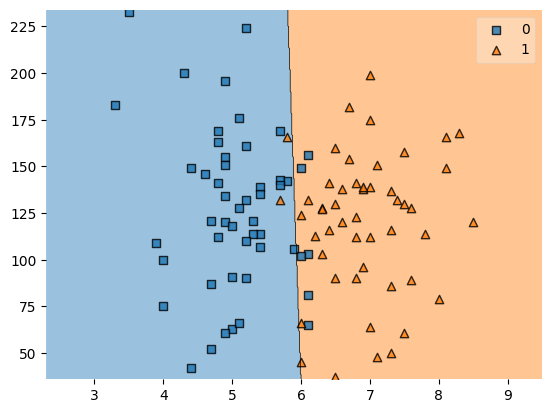

In [26]:
plot_decision_regions(X=x.to_numpy(), y=y.astype(int).to_numpy(), clf=sv)


## *Curved Polynomial*

In [27]:
sv = SVC(kernel="poly") 
sv.fit(X_trian, Y_trian)

print(sv.score(X_trian , Y_trian)*100)
print(sv.score(X_test , Y_test)*100)



55.00000000000001
55.00000000000001


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

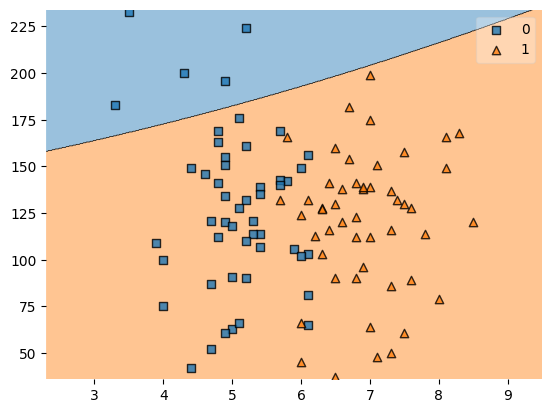

In [28]:
plot_decision_regions(X=x.to_numpy(), y=y.astype(int).to_numpy(), clf=sv)


## *Smooth Circular*

In [10]:
sv = SVC(kernel="rbf") 
sv.fit(X_trian, Y_trian)

print(sv.score(X_trian , Y_trian)*100)
print(sv.score(X_test , Y_test)*100)



56.25
35.0


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

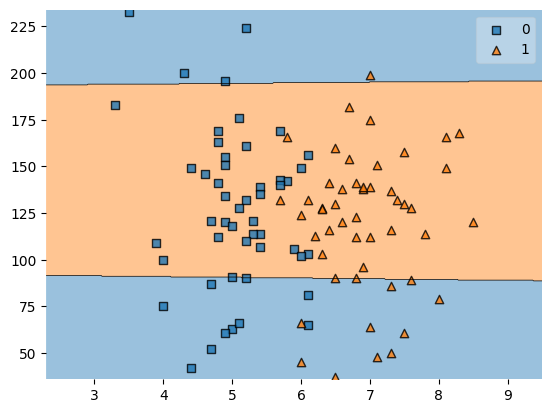

In [30]:
plot_decision_regions(X=x.to_numpy(), y=y.astype(int).to_numpy(), clf=sv)


## *S-Shaped Boundary*

In [13]:
sv = SVC(kernel="sigmoid") 
sv.fit(X_trian, Y_trian)

print(sv.score(X_trian , Y_trian)*100)
print(sv.score(X_test , Y_test)*100)



52.5
55.00000000000001


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

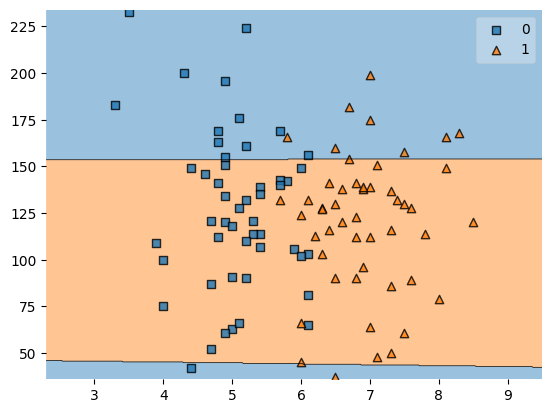

In [14]:
plot_decision_regions(X=x.to_numpy(), y=y.astype(int).to_numpy(), clf=sv)


## *Precomputed*

In [21]:
# Compute Gram matrix (similarity of each pair of training samples)
K_train = linear_kernel(X_trian, X_trian)

# Compute kernel between test and train data
K_test = linear_kernel(X_test, X_trian)

# Train using precomputed kernel
sv = SVC(kernel="precomputed")
sv.fit(K_train, Y_trian)

print(sv.score(K_train, Y_trian) * 100)
print(sv.score(K_test, Y_test) * 100)

91.25
95.0
